In [ ]:
# https://pytorch.org/get-started/locally/
# boostcourse - torch
# https://www.boostcourse.org/ai214
!nvidia-smi

Tue Aug 17 00:10:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip list | grep torch

torch                         1.9.0+cu102
torchsummary                  1.5.1
torchtext                     0.10.0
torchvision                   0.10.0+cu102


In [ ]:
import torch
import numpy as np


In [ ]:
nums = torch.arange(9)
nums

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
nums.reshape(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [ ]:
nums.view(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [ ]:
randoms = torch.rand((3,3))
randoms

tensor([[0.2743, 0.7198, 0.6428],
        [0.2358, 0.7579, 0.7126],
        [0.2216, 0.9795, 0.9600]])

In [ ]:
zeros = torch.zeros((3,3))
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
ones = torch.ones((3,3))
ones

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
torch.zeros_like(ones)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
zeros.shape

torch.Size([3, 3])

In [ ]:
zeros.size()

torch.Size([3, 3])

In [ ]:
nums * 3

tensor([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [ ]:
nums = nums.reshape((3,3))

In [ ]:
result = torch.add(nums,10)
result

tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

In [ ]:
result.numpy()

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [ ]:
range_nums = torch.arange(9).reshape(3,3)
range_nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [ ]:
range_nums = range_nums.view(-1)
range_nums

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
range_nums.view(1,9)

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [ ]:
nums[1]

tensor([3, 4, 5])

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
arr_torch.to(device)
arr_torch.to('cpu')

In [25]:
from torchvision import datasets, transforms

In [26]:
batch_size = 32
test_batch_size = 32

In [27]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download = True, 
                   transform = transforms.Compose([
                                                    transforms.ToTensor(),
                                                    transforms.Normalize(mean=(0.5,), std = (0.5,))
                   ])),
                   batch_size = batch_size,
                   shuffle = True
)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [28]:
!pip list | grep torchvision

torchvision                   0.10.0+cu102


In [29]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=False, download = True, 
                   transform = transforms.Compose([
                                                    transforms.ToTensor(),
                                                    transforms.Normalize(mean=(0.5,), std = (0.5,))
                   ])),
                   batch_size = batch_size,
                   shuffle = True
)

In [30]:
images, labels = next(iter(train_loader))

In [31]:
# 채널이 먼저 오는것을 알 수 있다.
images.shape

torch.Size([32, 1, 28, 28])

In [32]:
labels.shape

torch.Size([32])

In [33]:
import matplotlib.pyplot as plt


In [34]:
images[0].shape

torch.Size([1, 28, 28])

In [35]:
# 1차원짜리를 날려버린다. squeeze
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [36]:
image = torch_image.numpy()
image.shape

(28, 28)

In [37]:
label = labels[0].numpy()

In [38]:
label

array(1)

<function matplotlib.pyplot.show>

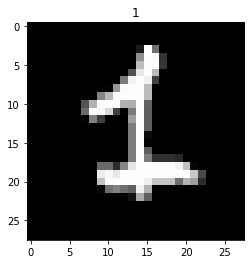

In [39]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show